In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import csv

In [15]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor']='#FFE5B4'  #setting pitch color

In [16]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\MyWork\\World Happiness Report 2022.csv")

In [17]:
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [50]:
# taken the columns that required for an analysis
data_columns = ['Country','Happiness score','GDP per capita','Social support','Healthy life expectancy','Generosity','Perceptions of corruption']

In [37]:
data

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [39]:
data.isnull().sum()

RANK                            0
Country                         0
Happiness score                 0
Whisker-high                    0
Whisker-low                     0
Dystopia (1.83) + residual      0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
 Generosity                     0
Perceptions of corruption       0
dtype: int64

In [41]:
headdata = data.head(10)
headdata

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483


In [72]:
taildata = data.tail(10)
taildata

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
136,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083
137,138,Malawi,3.750,3.941,3.560,1.661,0.648,0.279,0.388,0.477,0.140,0.157
138,139,Tanzania,3.702,3.847,3.558,0.735,0.848,0.597,0.425,0.578,0.248,0.270
139,140,Sierra Leone,3.574,3.732,3.416,1.556,0.686,0.416,0.273,0.387,0.202,0.055
140,141,Lesotho*,3.512,3.748,3.276,1.312,0.839,0.848,0.000,0.419,0.076,0.018
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [44]:
data.dtypes

RANK                              int64
Country                          object
Happiness score                 float64
Whisker-high                    float64
Whisker-low                     float64
Dystopia (1.83) + residual      float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
 Generosity                     float64
Perceptions of corruption       float64
dtype: object

In [45]:
data.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [46]:
 taildata.describe() 

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,141.50000,3.339100,3.492700,3.185800,0.914900,0.933600,0.48530,0.332400,0.401000,0.134500,0.137300
std,3.02765,0.437869,0.475988,0.403095,0.539941,0.288021,0.28091,0.163592,0.206852,0.073775,0.162556
min,137.00000,2.404000,2.469000,2.339000,0.187000,0.648000,0.00000,0.000000,0.000000,0.012000,0.005000
25%,139.25000,3.063250,3.198000,2.928500,0.539000,0.764750,0.31325,0.274750,0.343500,0.083750,0.039250
50%,141.50000,3.491500,3.699500,3.275500,0.935000,0.843500,0.53750,0.297500,0.448000,0.123000,0.092500
75%,143.75000,3.670000,3.822250,3.522500,1.299750,0.942750,0.66675,0.415750,0.559500,0.198250,0.144000
max,146.00000,3.760000,3.941000,3.618000,1.661000,1.503000,0.84800,0.631000,0.621000,0.248000,0.544000


In [47]:
data.corr()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
RANK,1.000000,-0.980856,-0.978345,-0.982031,-0.444633,-0.792137,-0.773773,-0.750945,-0.623040,-0.032831,-0.403199
Happiness score,-0.980856,1.000000,0.999333,0.999383,0.498990,0.763677,0.777889,0.740260,0.624822,0.063785,0.416216
Whisker-high,-0.978345,0.999333,1.000000,0.997434,0.514099,0.752104,0.773375,0.727611,0.622934,0.065728,0.413718
Whisker-low,-0.982031,0.999383,0.997434,1.000000,0.483762,0.773844,0.781302,0.751530,0.625926,0.061820,0.418162
Dystopia (1.83) + residual,-0.444633,0.498990,0.514099,0.483762,1.000000,-0.073423,0.083606,-0.006886,0.117695,0.066915,-0.051075
GDP per capita,-0.792137,0.763677,0.752104,0.773844,-0.073423,1.000000,0.722421,0.815386,0.458591,-0.164472,0.377589
Social support,-0.773773,0.777889,0.773375,0.781302,0.083606,0.722421,1.000000,0.666760,0.480466,-0.002339,0.223352
Healthy life expectancy,-0.750945,0.740260,0.727611,0.751530,-0.006886,0.815386,0.666760,1.000000,0.433166,-0.098133,0.362626
Freedom to make life choices,-0.623040,0.624822,0.622934,0.625926,0.117695,0.458591,0.480466,0.433166,1.000000,0.176800,0.402474
Generosity,-0.032831,0.063785,0.065728,0.061820,0.066915,-0.164472,-0.002339,-0.098133,0.176800,1.000000,0.096107


In [54]:
corrdata = data[['Country','Happiness score','GDP per capita','Social support',
                 'Healthy life expectancy','Perceptions of corruption']].corr()
corrdata

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption
Happiness score,1.000000,0.763677,0.777889,0.740260,0.416216
GDP per capita,0.763677,1.000000,0.722421,0.815386,0.377589
Social support,0.777889,0.722421,1.000000,0.666760,0.223352
Healthy life expectancy,0.740260,0.815386,0.666760,1.000000,0.362626
Perceptions of corruption,0.416216,0.377589,0.223352,0.362626,1.000000


In [56]:
subdata = data[['Country','Happiness score','GDP per capita','Social support',
                'Healthy life expectancy','Perceptions of corruption']]
subdata

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption
0,Finland,7.821,1.892,1.258,0.775,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.419
...,...,...,...,...,...,...
141,Botswana*,3.471,1.503,0.815,0.280,0.102
142,Rwanda*,3.268,0.785,0.133,0.462,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.034


Text(0, 0.5, 'Counts')

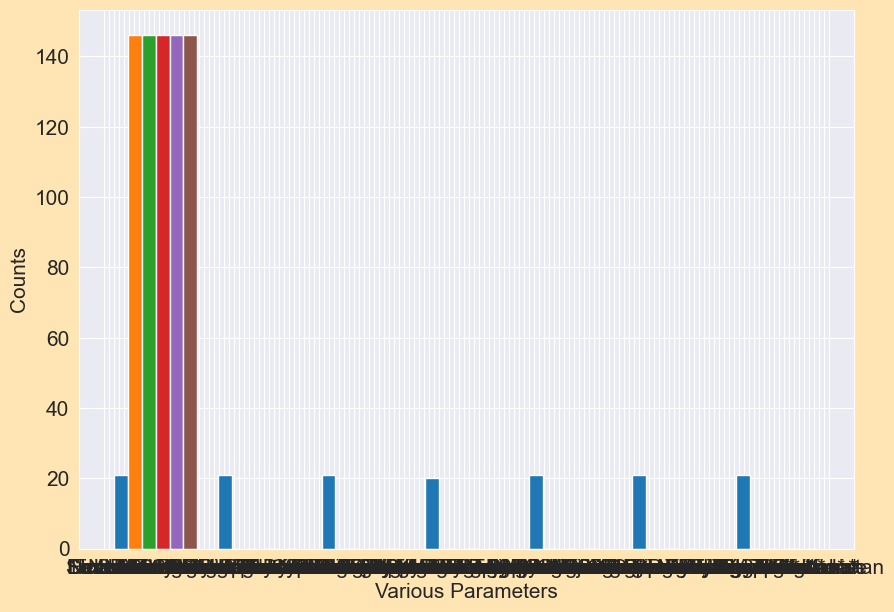

In [59]:
plt.hist(subdata,bins=7)
plt.xlabel("Various Parameters")
plt.ylabel("Counts")

<StemContainer object of 3 artists>

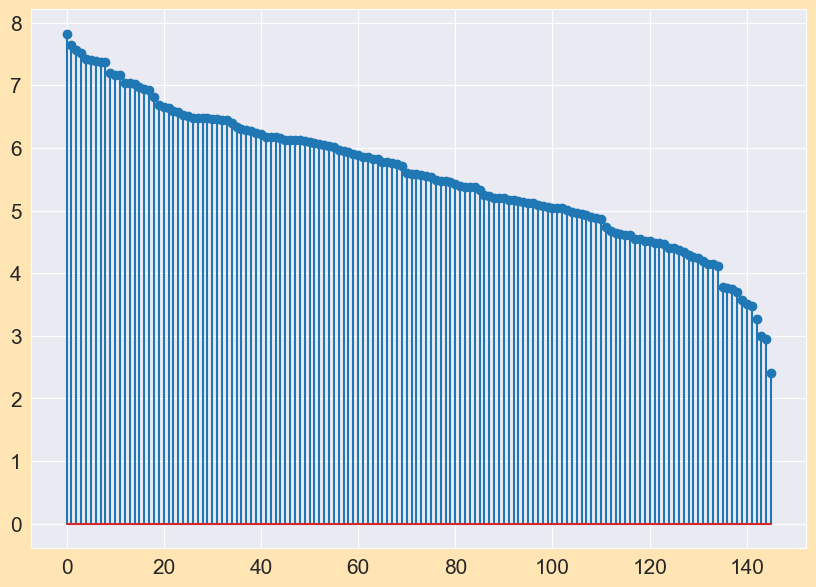

In [63]:
plt.stem(data['Happiness score'])

<AxesSubplot:xlabel='Social support', ylabel='Happiness score'>

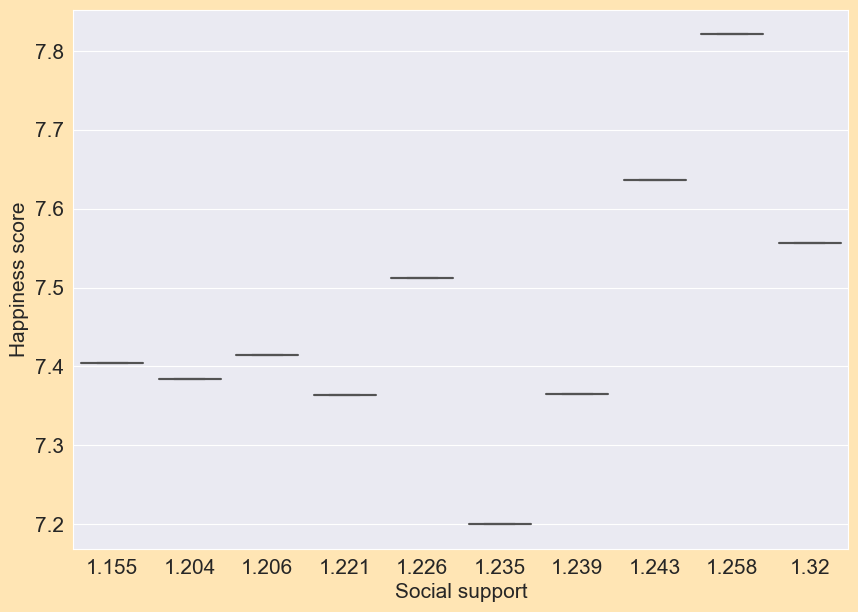

In [68]:
sns.boxplot(x="Social support",y="Happiness score",
            data = headdata,palette="coolwarm")

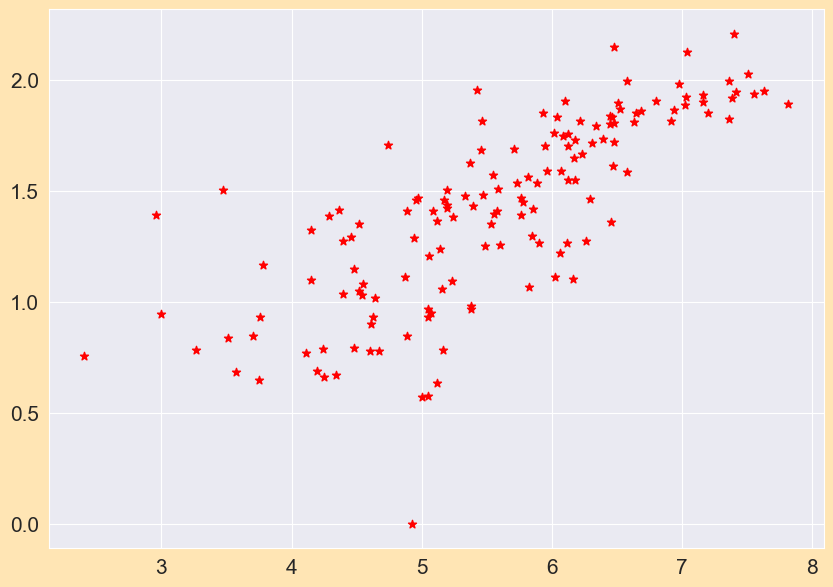

In [69]:
plt.scatter(x="Happiness score",y="GDP per capita",
            data = subdata,marker="*",color="Red")

<AxesSubplot:>

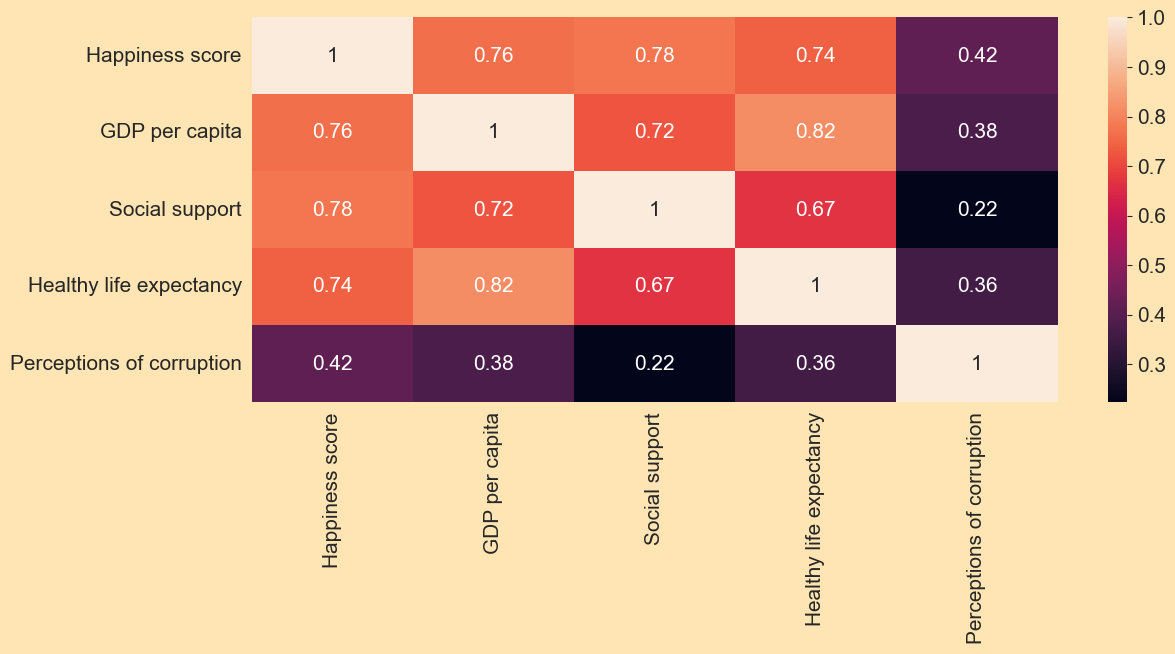

In [70]:
plt.figure(figsize=[13, 5])
sns.heatmap(corrdata,annot=True)

<AxesSubplot:ylabel='count'>

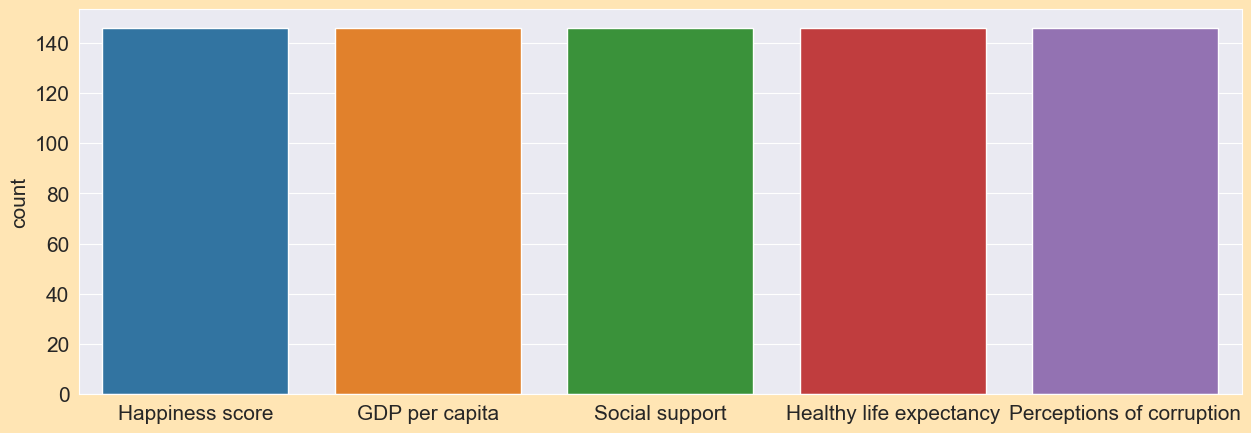

In [71]:
plt.figure(figsize=[15,5])
sns.countplot